# Project Description
#### Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

### HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.
### Attrition in HR
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.
### Attrition affecting Companies
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.


# Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Import data

In [2]:
df=pd.read_csv("C:/Users/KHUSHBOO RANI/OneDrive/Desktop/Projects/ML project/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [4]:
df.tail(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1460,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,...,2,80,0,5,3,1,5,4,0,4
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,...,2,80,1,20,3,3,3,2,2,0
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,...,1,80,1,21,2,2,20,9,9,6
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
df.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1056,28,Yes,Travel_Frequently,1496,Sales,1,3,Technical Degree,1,1486,...,4,80,1,5,3,4,3,2,1,2
1075,32,No,Travel_Rarely,495,Research & Development,10,3,Medical,1,1516,...,2,80,0,10,5,4,5,2,0,0
1138,50,No,Travel_Frequently,1234,Research & Development,20,5,Medical,1,1606,...,3,80,1,32,3,3,30,8,12,13
726,31,No,Travel_Frequently,853,Research & Development,1,1,Life Sciences,1,1011,...,3,80,1,4,1,3,4,3,0,3
968,36,No,Travel_Frequently,607,Sales,7,3,Marketing,1,1362,...,4,80,1,17,2,2,15,7,6,13
292,31,No,Travel_Frequently,444,Sales,5,3,Marketing,1,399,...,3,80,1,2,5,2,2,2,2,2
240,39,No,Travel_Rarely,1431,Research & Development,1,4,Medical,1,332,...,3,80,3,7,1,3,3,2,1,2
564,45,No,Travel_Rarely,954,Sales,2,2,Technical Degree,1,783,...,1,80,0,9,3,3,8,7,3,1
467,37,No,Non-Travel,142,Sales,9,4,Medical,1,626,...,4,80,1,9,6,3,9,5,7,7
521,27,No,Travel_Frequently,1410,Sales,3,1,Medical,1,714,...,2,80,2,6,3,3,6,5,0,4


## EDA (Exploratory data analysis)

In [6]:
df.shape

(1470, 35)

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
# Lets check all the datatypes of our dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

As per above information we can see that our dataset has 26 integer values and 9 object values.

We will need to treat the object datatype columns so that our machine learning model can understand the data

In [9]:
# Lets check the number of unique values in our dataset columns:
df.nunique().to_frame("Unique Values")

,Unique Values
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


In [10]:
# Lets check the missing data if any:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

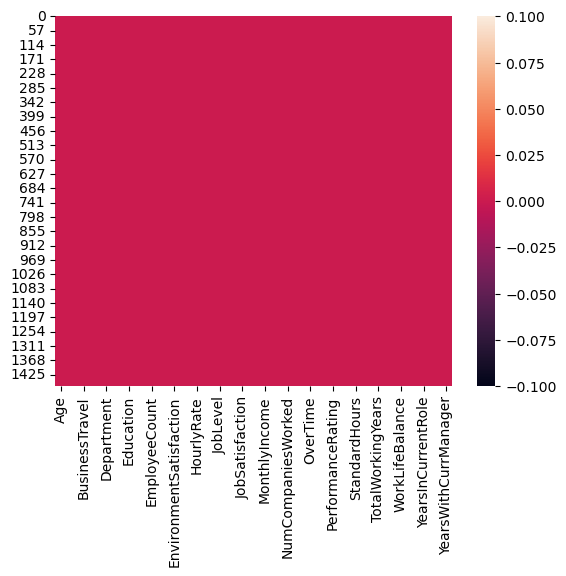

In [11]:
#plotting missing values in heatmap is there is present
sns.heatmap(df.isnull())
plt.show()

In [12]:
df.isnull().sum().sum()

0

#### There is no missing data in our dataset, so we dont need to handle it

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


With the help of decribe method in transpose format we can see column details clearly. The count column once again confirms that there are no missing data concern in our dataset.

However if we check the min column we do notice columns with zero as their values. However considering the columns that have 0 value in them it is quite possible for freshers in an organisation to have them as 0 marked in their records.

Here we only get numerical data information therefore all the object datatype columns have been ignored.

In [14]:
#dropping unnecessary coulmns
df.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis=1, inplace=True)

In [15]:
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        object_datatype.append(x)
object_datatype

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

Here we have 8 columns in our dataset with object datatype.

We need to encode the data into numerical values before preparing classification model.

In [16]:
integer_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'int64':
        integer_datatype.append(x)
integer_datatype

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

Here we have 23 columns with integer datatype which has numerical values in it.

## Data Visualaization and Analysis

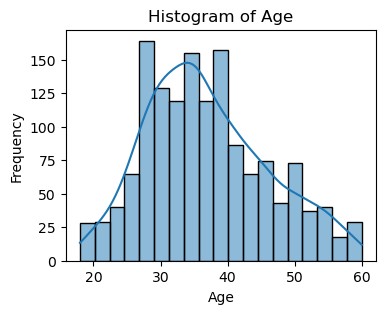

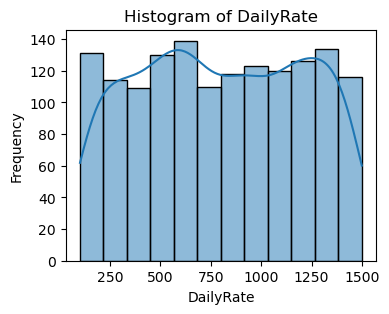

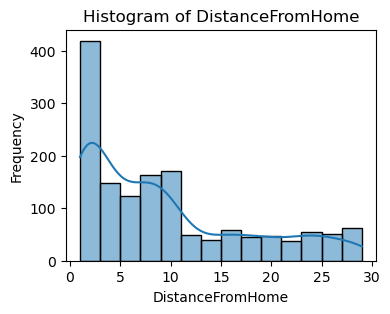

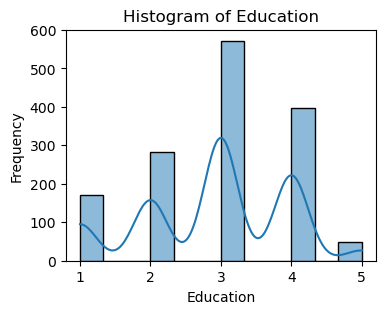

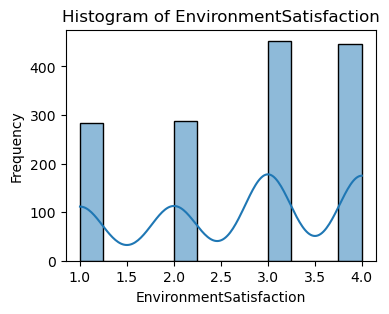

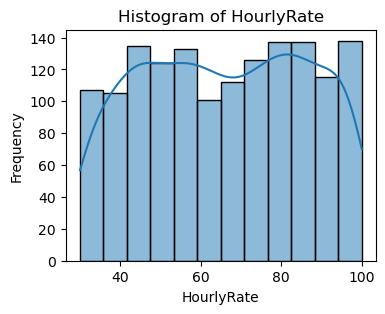

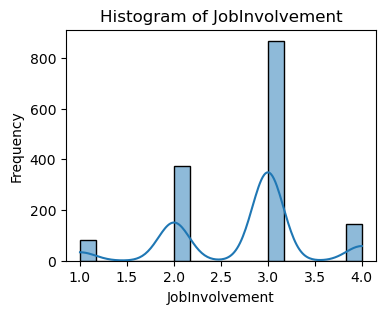

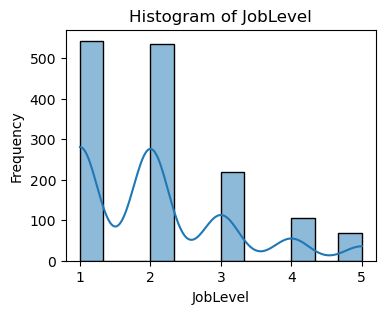

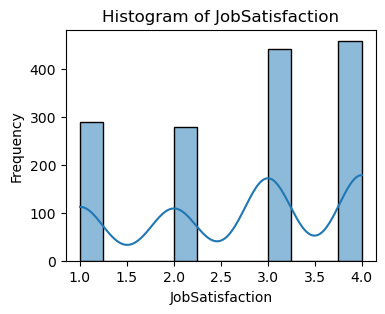

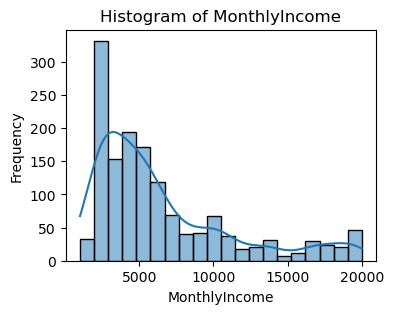

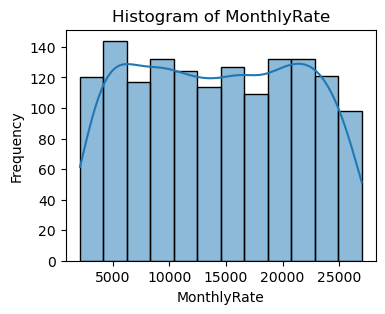

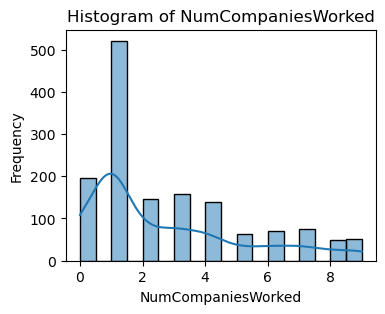

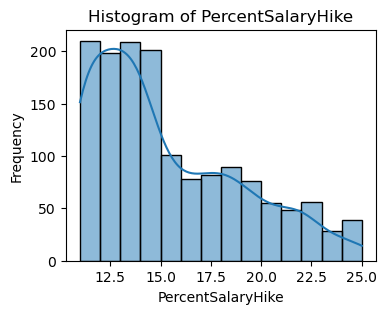

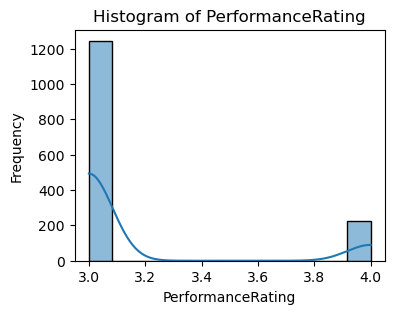

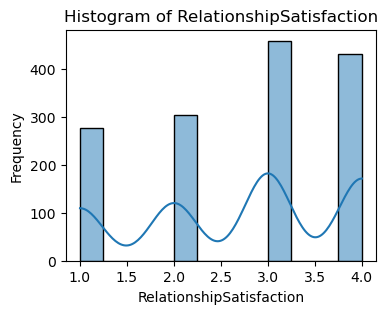

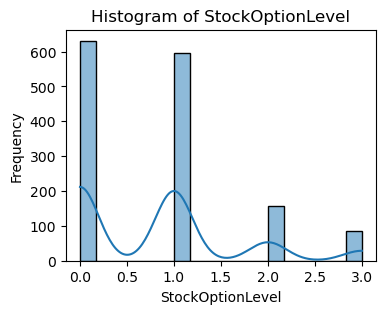

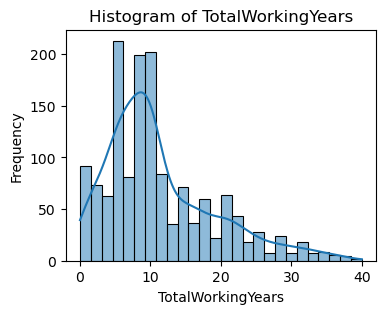

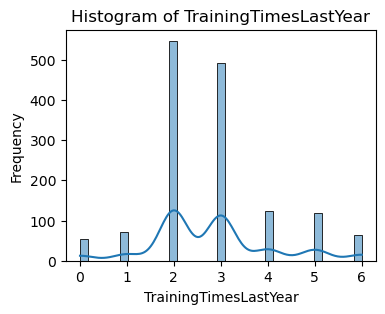

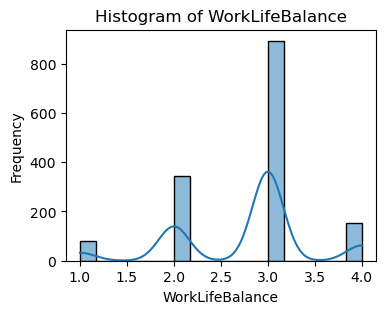

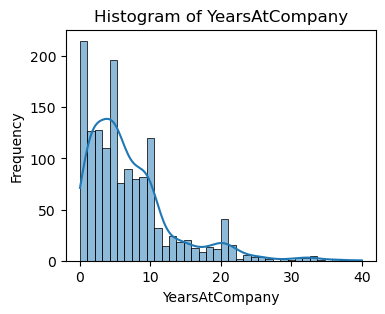

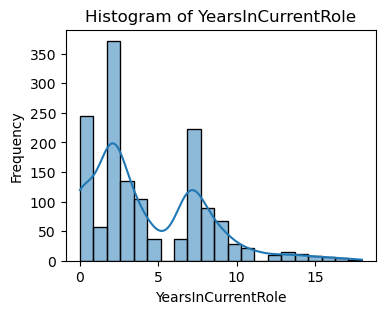

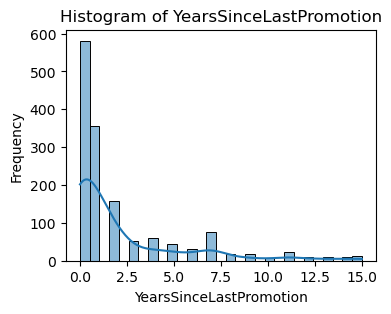

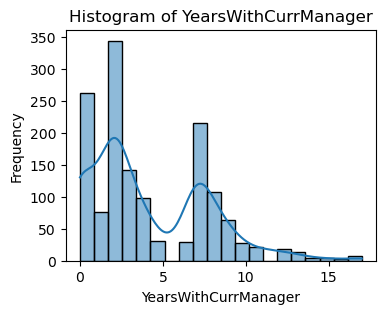

In [17]:
integer_columns = df.select_dtypes(include=['int']).columns

for column in integer_columns:
    plt.figure(figsize=(4,3))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

## Visualization Of Data Using Countplot

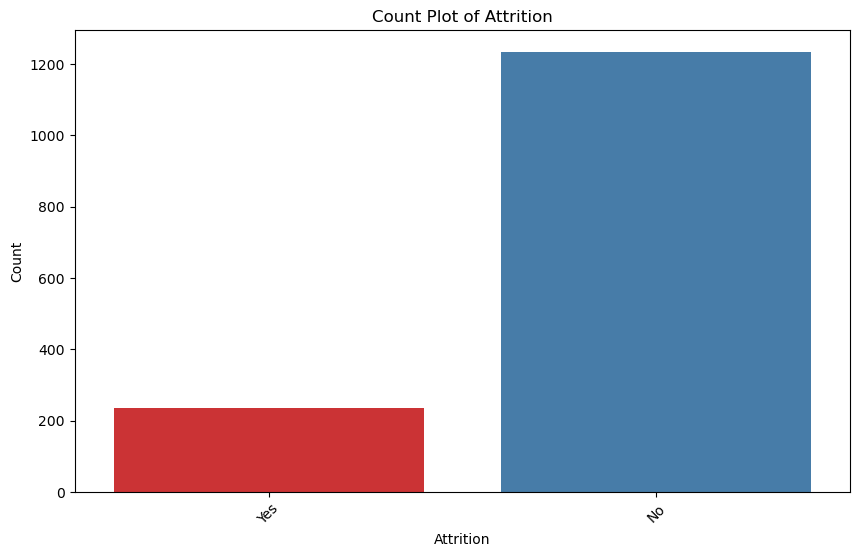

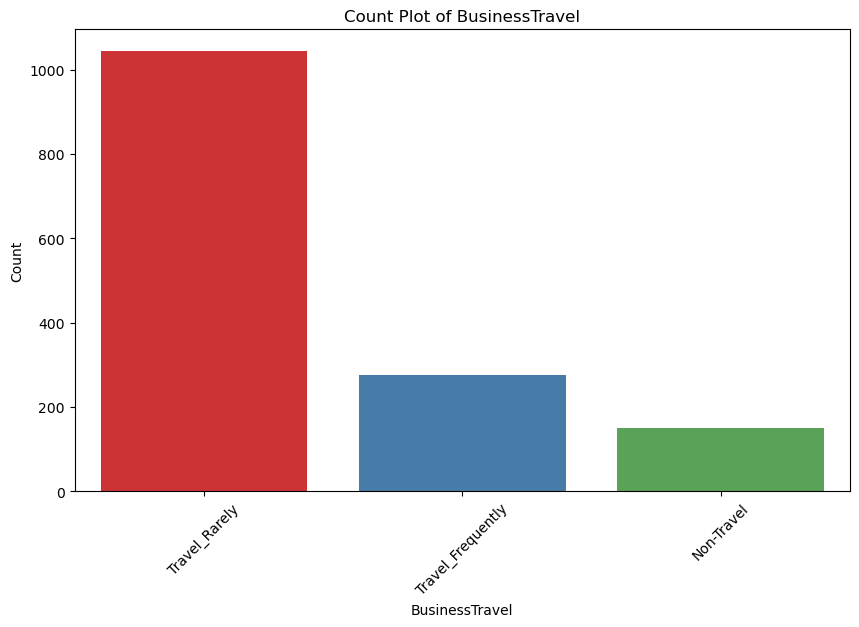

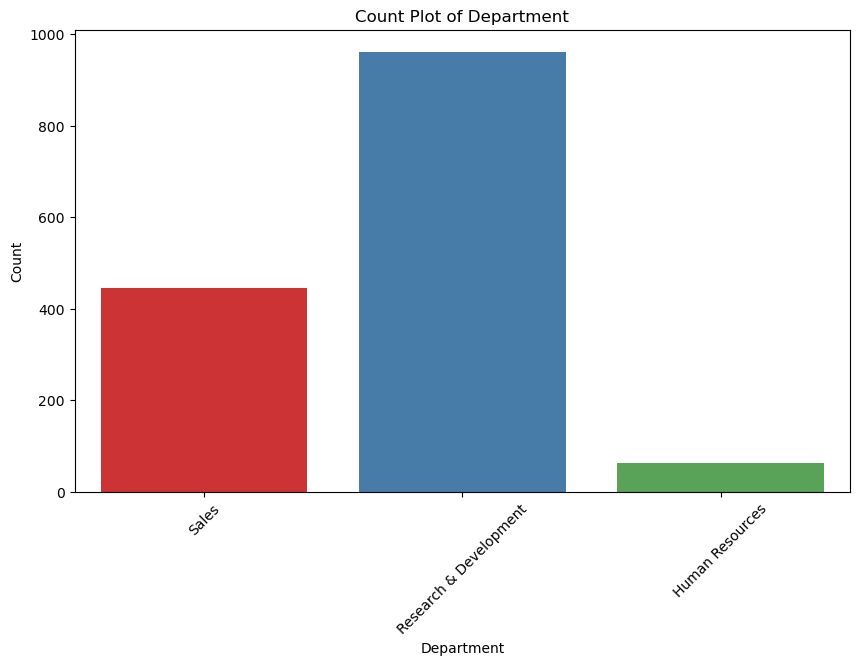

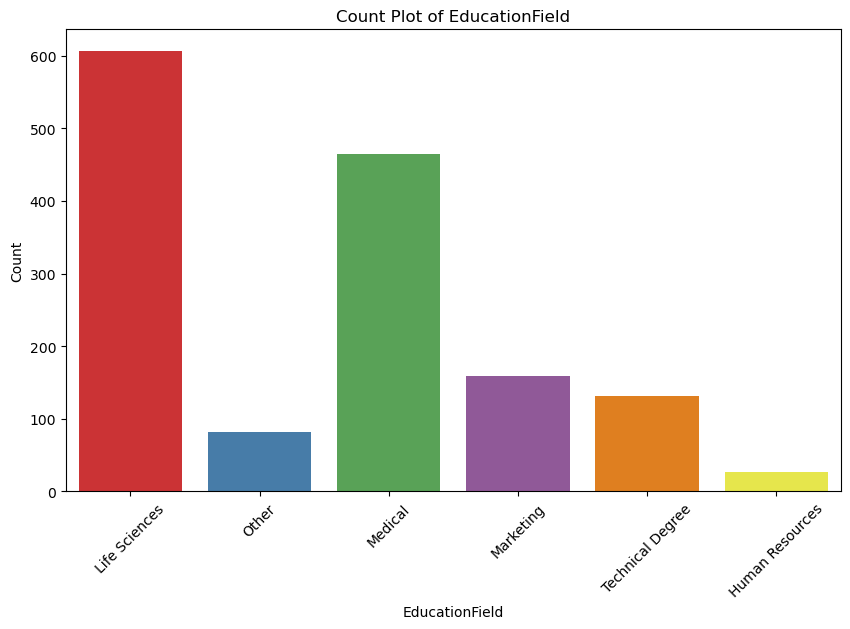

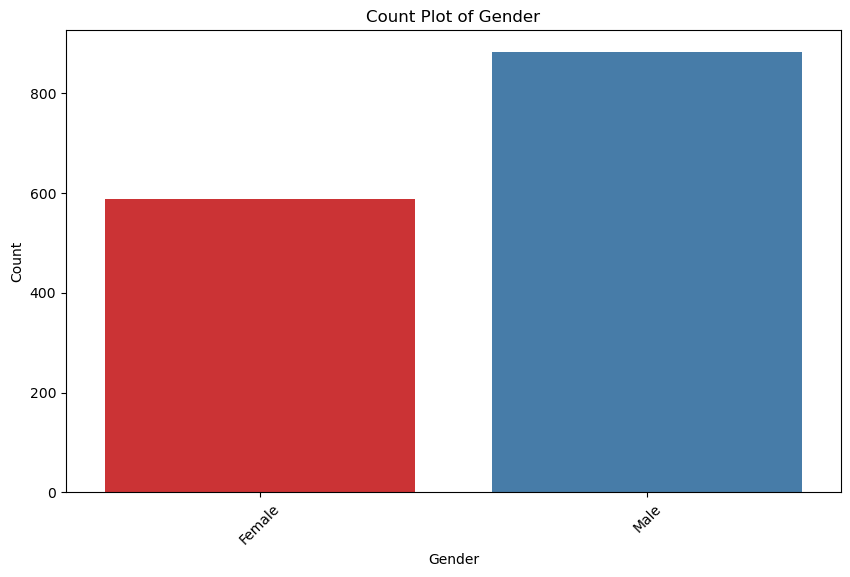

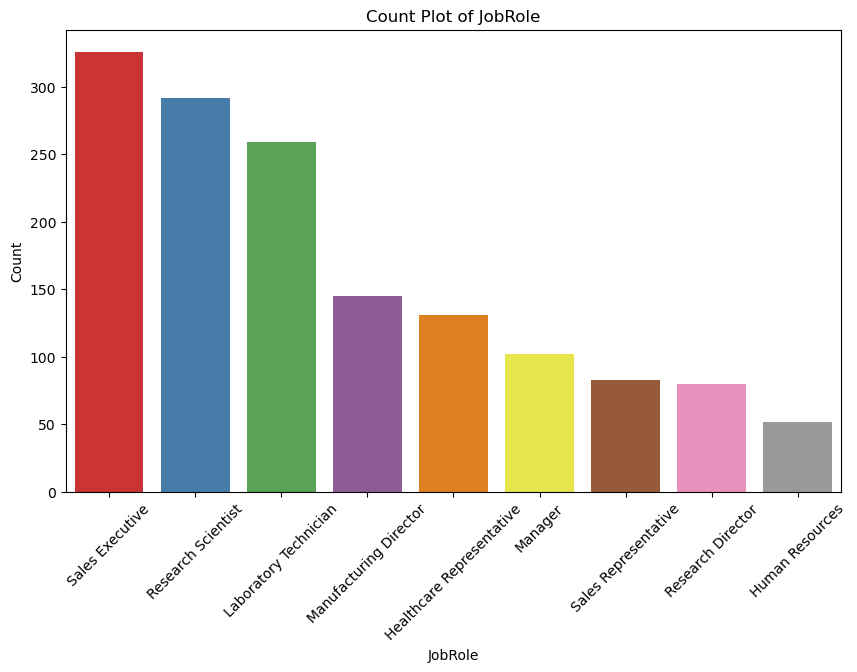

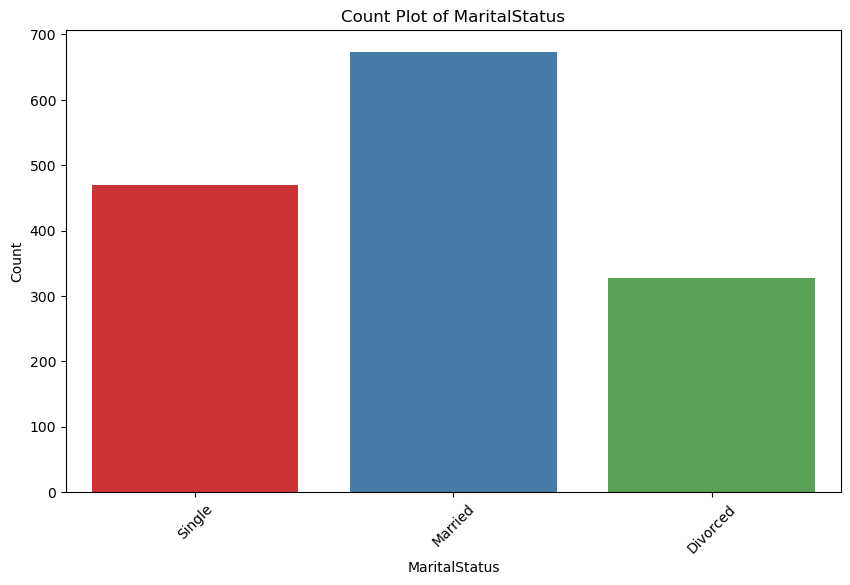

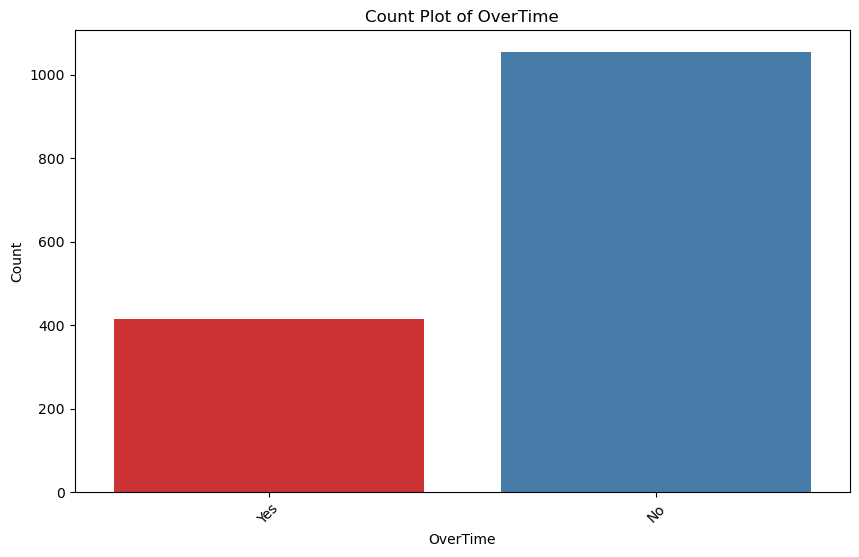

In [18]:
od = [col for col in df.columns if df[col].dtype == 'object']

for column in od:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, palette='Set1')
    plt.title(f'Count Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45) 
    plt.show()


1. Attrition have more No approx 1200 and less yeas approx 200
2. Buisiness Travel have more people wo Travel Rarely approx 1000, frequest travler is is about 300 and Non_Travler is less then 200
3. In Department Research and Development have more people nearly 1000, Sales have approx 400 and in Human resources about 50
4. In Education Life Sciences Have most peoplr more then 600 ahnd in Human resources have verry lkeass abot 50
5. In Gender Female is less almost in count about 600 and male is more then 800
6. In job role Sales Executive Have more then 300 people and in Human Resources have verry less abot 50
7. In Marital Status Married prople are mpore approx 650, Single people are about 450 and Divorced are about 450
8. in Overtime about 400 peoplr do And about 1000 people do not

## Checking outliers using Boxplot

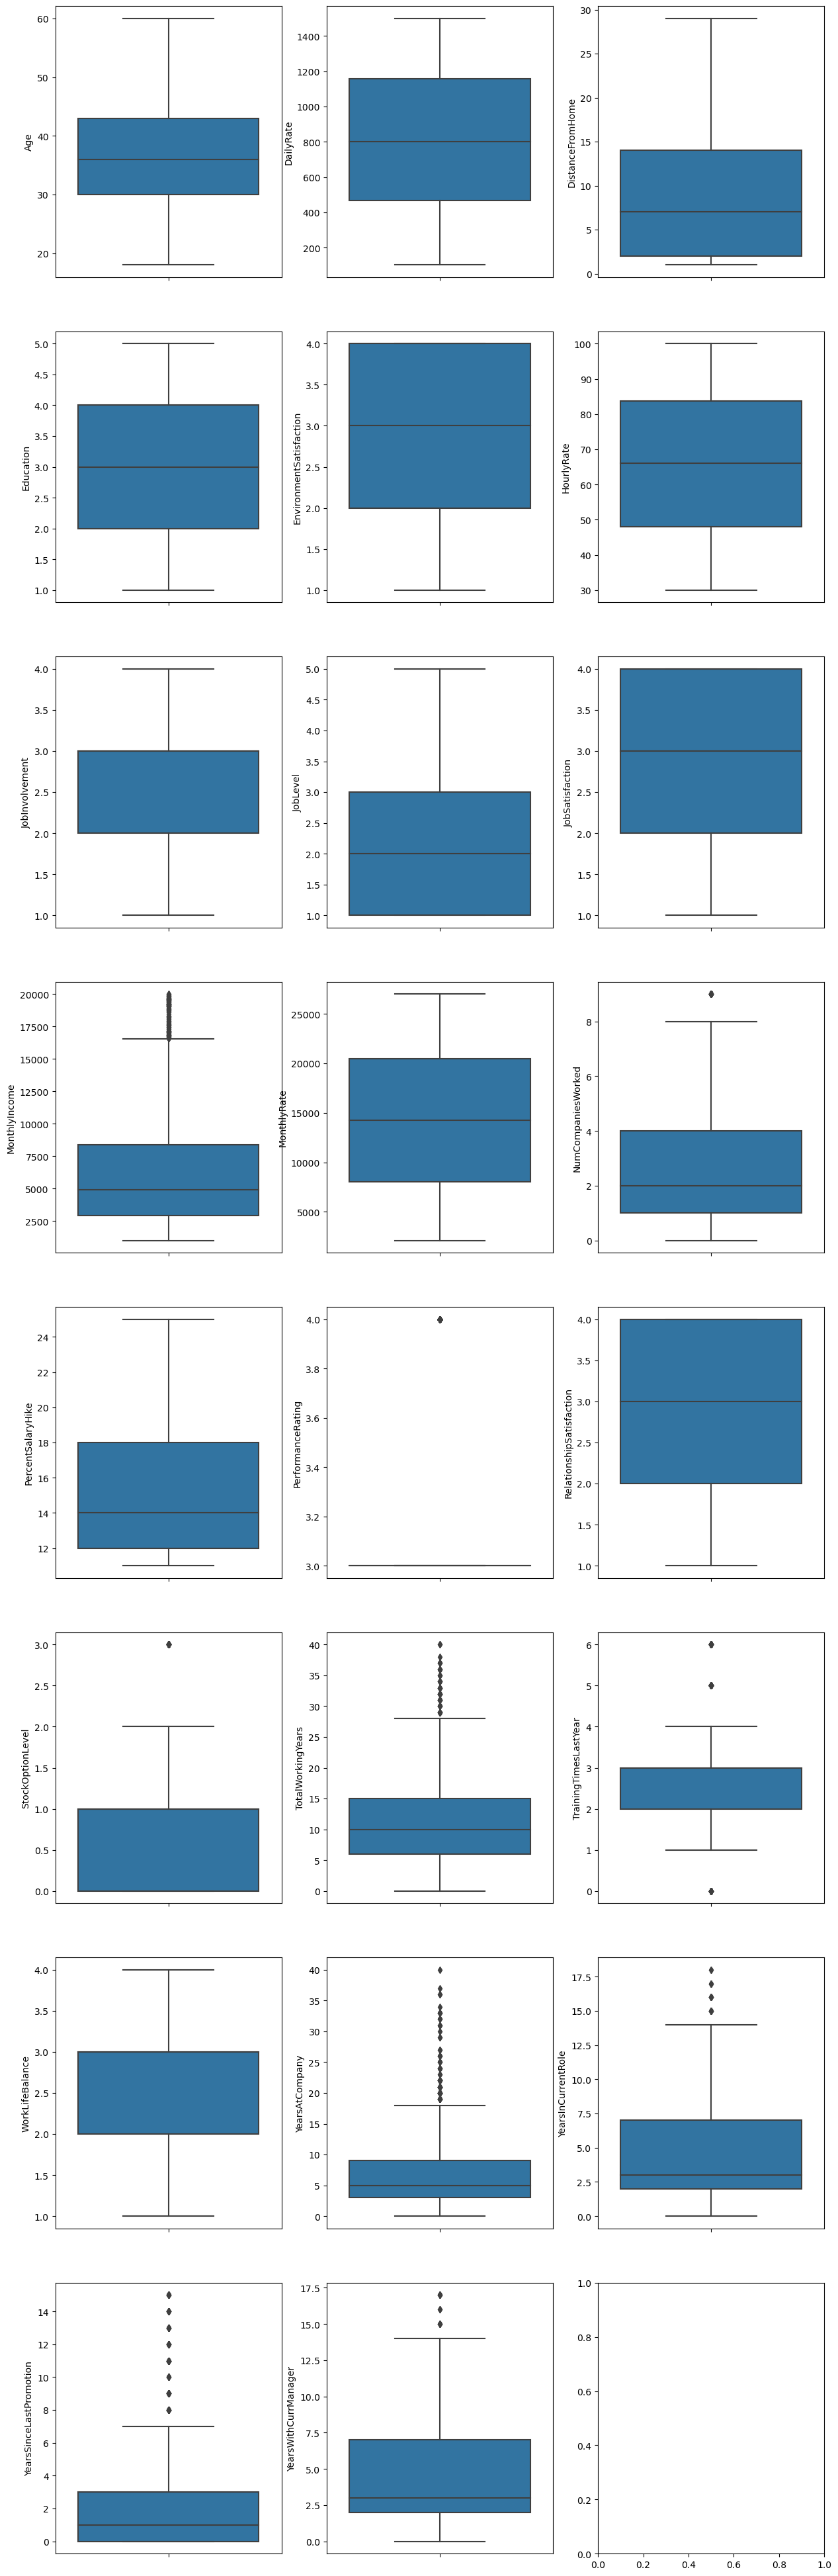

In [19]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatype].items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.show()

As per above boxplot, we can see that there is presence of some outliers in below columns:

1. Monthly Income
2. NumCompaniesWorked
3. Performance Rating
4. StockOptionLevel
5. TotalWorkingYears
6. TrainingTimeLastYear
7. YearsAtCompany
8. YearsInCurrentRole
9. YearsSinceLastPromotion
10. YearsWithCurrManager

## Visualization of data using Distribution plot

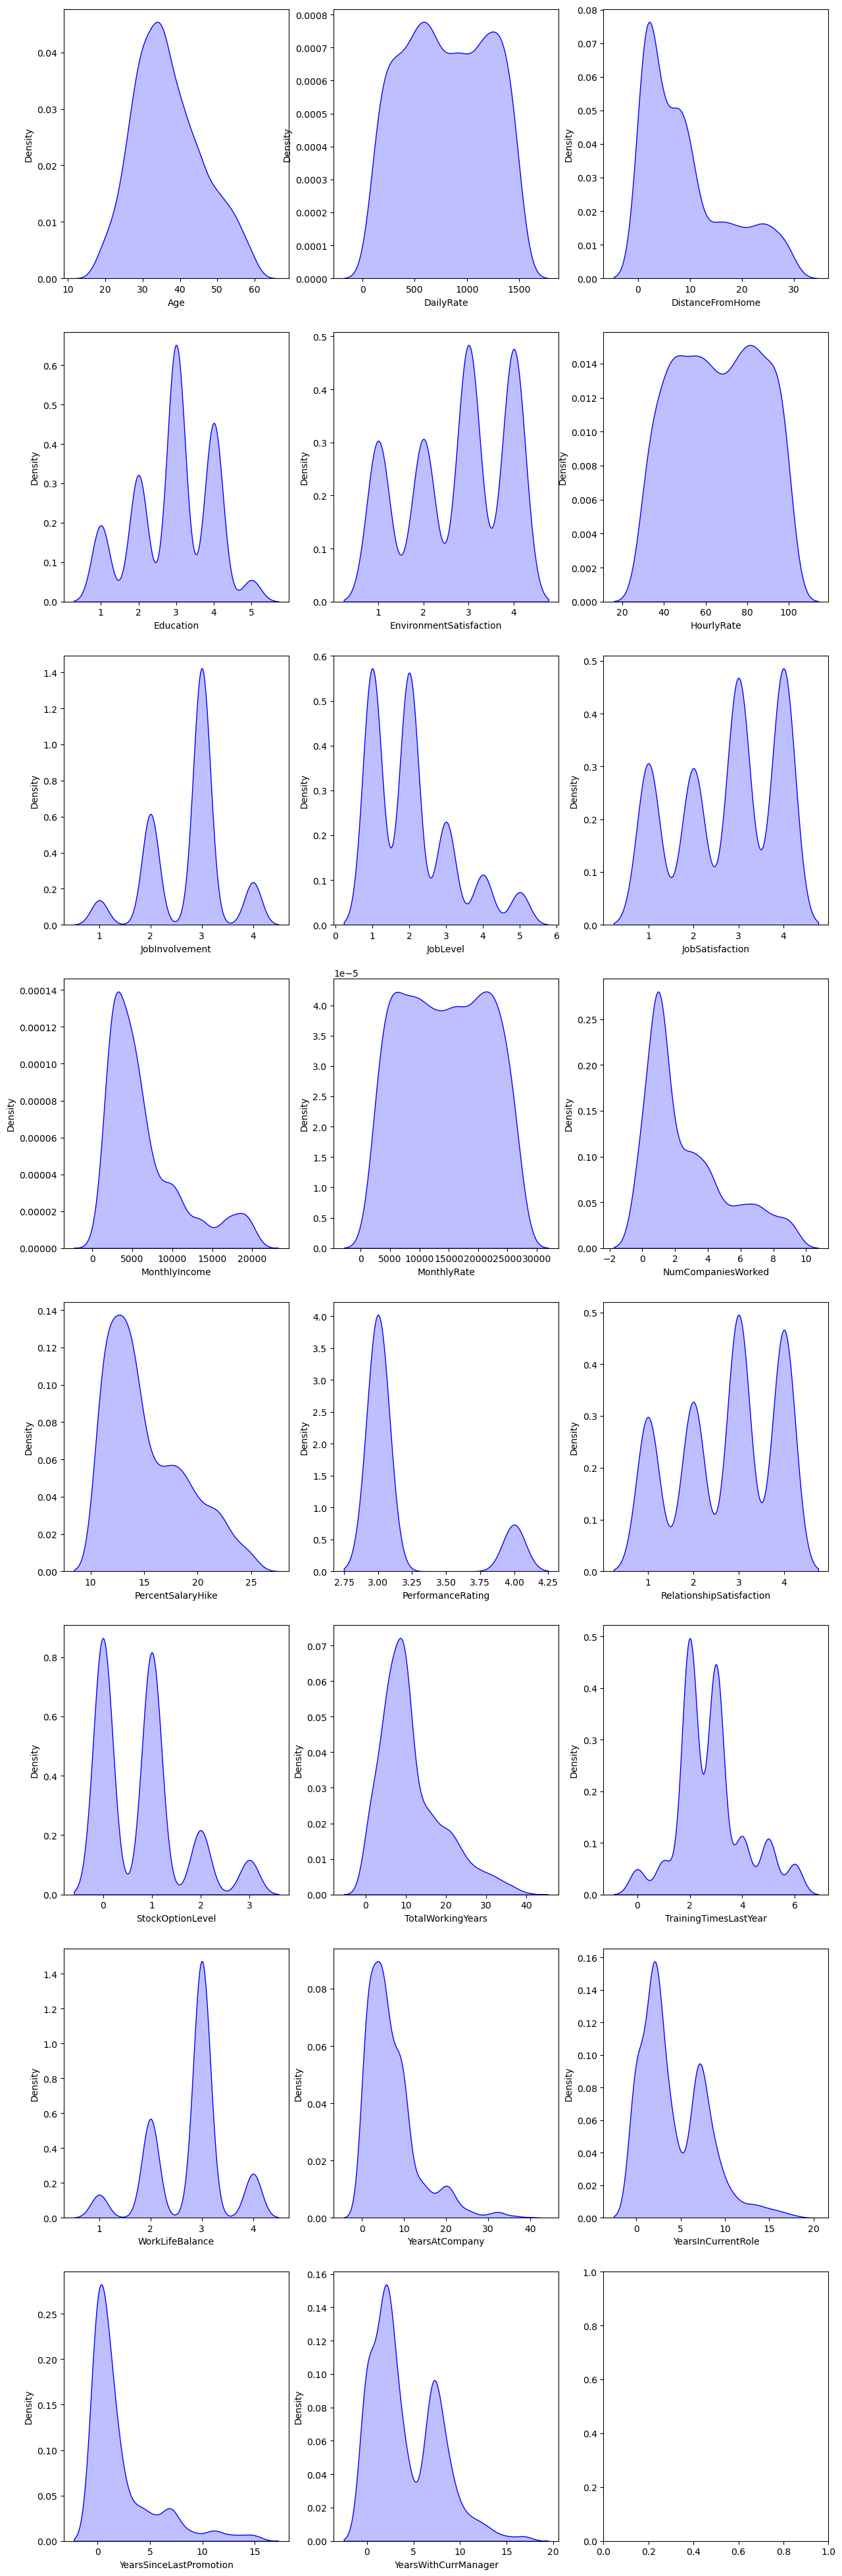

In [20]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="b", kde_kws={"shade": True})
    index += 1
plt.show()

Some skewness is present in few columns that we will need to handle.

DistanceFromHome

MonthlyIncome

NumCompaniesWorked

PercentSalaryHike

TotalWorkingYears

TrainingTimesLastYear

YearsAtCompany

YearsInCurrentRole

YearsSinceLastPromotion

YearsWithCurrManager

## Visualization of Data using Violinplot

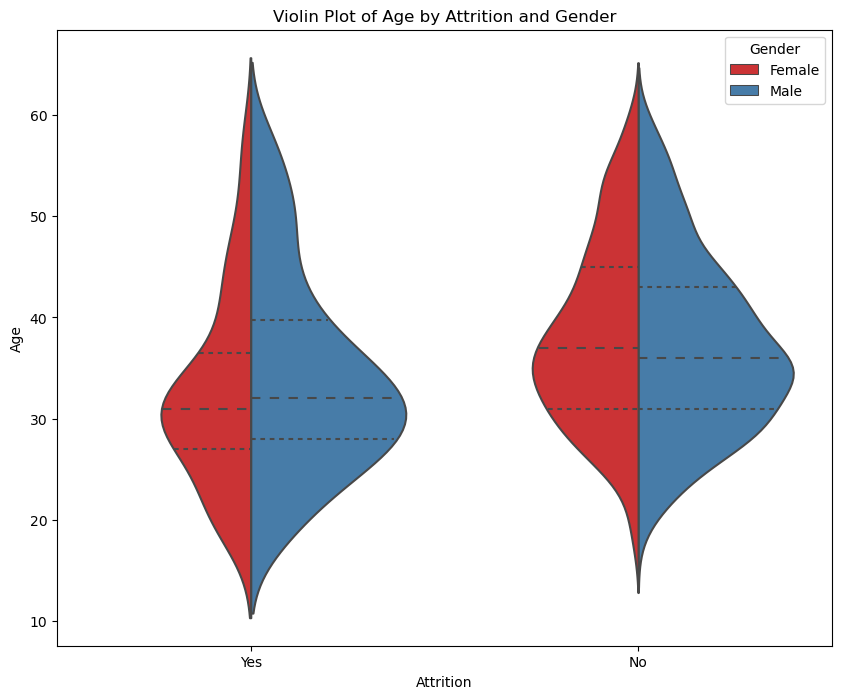

In [21]:
plt.figure(figsize=(10, 8))
sns.violinplot(x="Attrition", y="Age", hue="Gender", data=df, split=True, scale="count", inner="quartile", palette="Set1")
plt.title("Violin Plot of Age by Attrition and Gender")
plt.show()


In the above violin plot we see that the Attrition counts both in male and female are high when the are in their mid 20's and 30's of age.

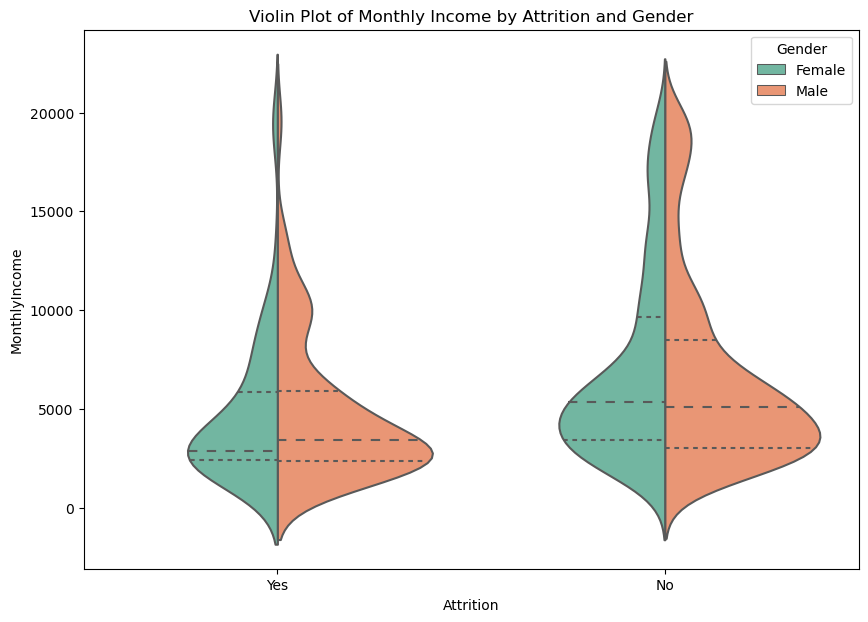

In [22]:
plt.figure(figsize=(10, 7))
sns.violinplot(x="Attrition", y="MonthlyIncome", hue="Gender", data=df, split=True, scale="count", inner="quartile", palette="Set2")
plt.title("Violin Plot of Monthly Income by Attrition and Gender")
plt.show()


In the above plot we can see that the Attrition peaks for both male and female employees when the monthly income is less than 5000.

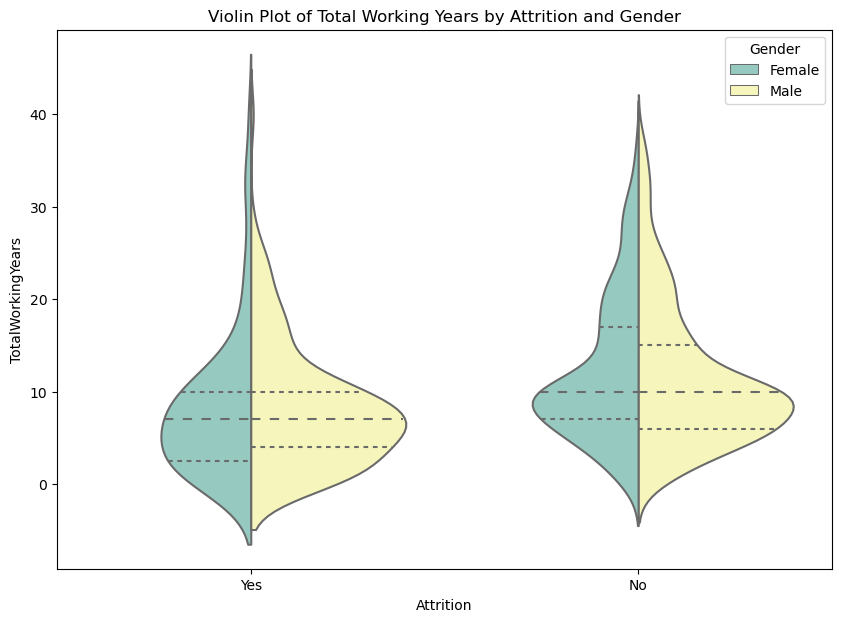

In [23]:
plt.figure(figsize=(10, 7))
sns.violinplot(x="Attrition", y="TotalWorkingYears", hue="Gender", data=df, split=True, scale="count", inner="quartile", palette="Set3")
plt.title("Violin Plot of Total Working Years by Attrition and Gender")
plt.show()

In the above violin plot we notice that the Attrition for both male ad female employees occur when they are in their experience range of 1-10 years

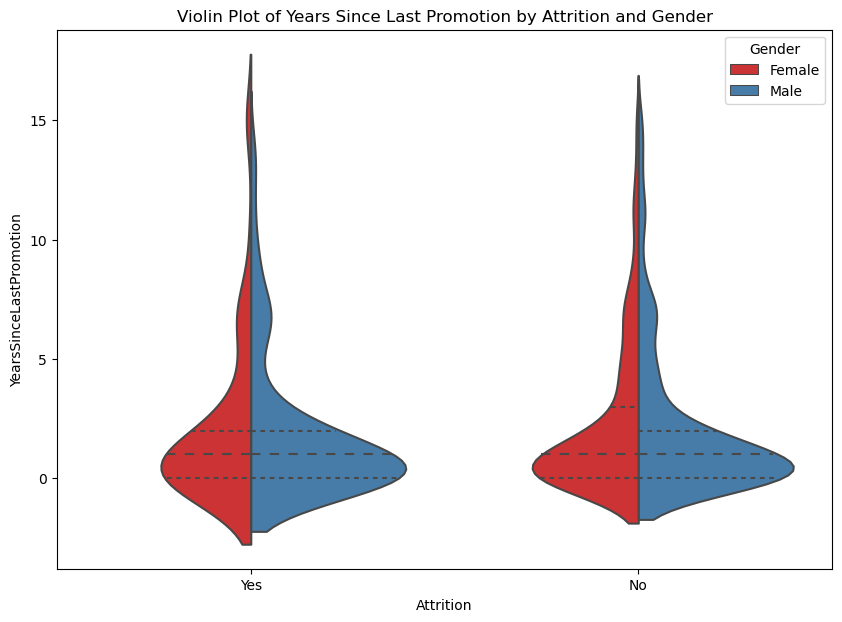

In [24]:
plt.figure(figsize=(10, 7))
sns.violinplot(x="Attrition", y="YearsSinceLastPromotion", hue="Gender", data=df, split=True, scale="count", inner="quartile", palette="Set1")
plt.title("Violin Plot of Years Since Last Promotion by Attrition and Gender")
plt.show()

In the above plot we see that the Attrition for both make and female employees happen when they do not see prootions happening after years of gaining experience.

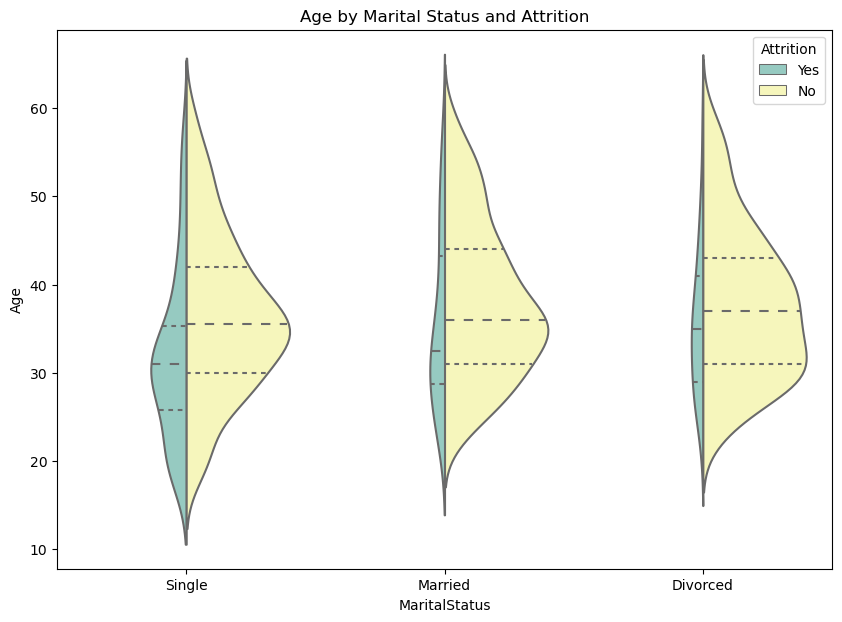

In [25]:

plt.figure(figsize=(10, 7))
sns.violinplot(x="MaritalStatus", y="Age", hue="Attrition", data=df, split=True, scale="count", inner="quartile", palette="Set3")
plt.title("Age by Marital Status and Attrition")
plt.show()

In the above violin plot we can see that the Attrition rate is quite less in employees when they are married or divorced as compared to when they are single and have lesser responsibilities to deal with at their age

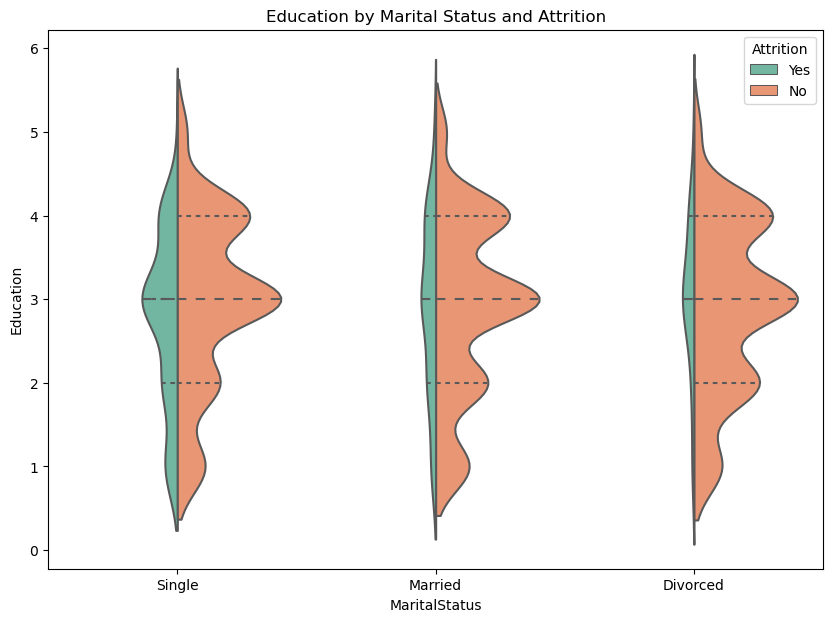

In [26]:
plt.figure(figsize=(10, 7))
sns.violinplot(x="MaritalStatus", y="Education", hue="Attrition", data=df, split=True, scale="count", inner="quartile", palette="Set2")
plt.title("Education by Marital Status and Attrition")
plt.show()

In the above plot we notice that once again employees who are married or divorced and with good education choose stability in life rather than the one's who are single and are okay to take risks and oppotunities in life.

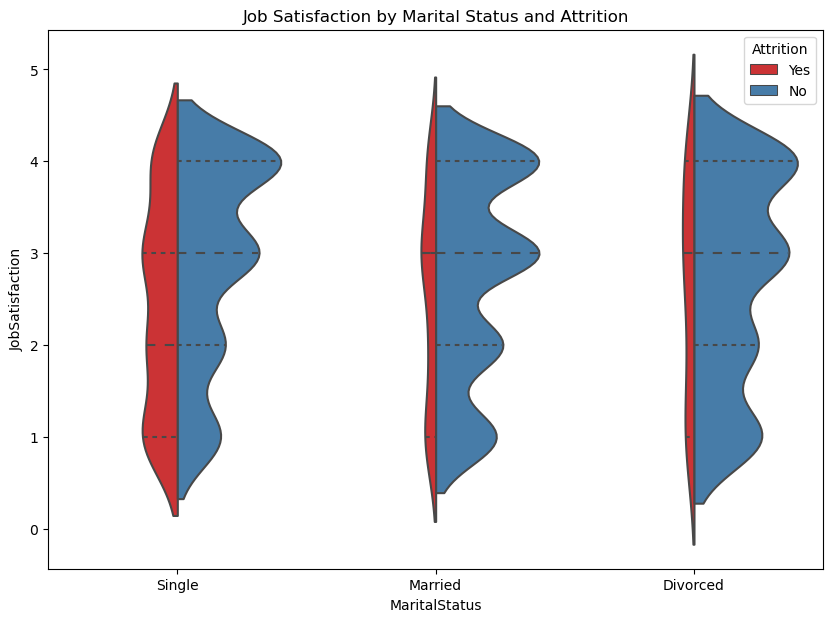

In [27]:
plt.figure(figsize=(10, 7))
sns.violinplot(x="MaritalStatus", y="JobSatisfaction", hue="Attrition", data=df, split=True, scale="count", inner="quartile", palette="Set1")
plt.title("Job Satisfaction by Marital Status and Attrition")
plt.show()

In the above voilin part we can see that the job satisfaction part for singles is not that great compared to employees who are married or divorced may be due to the year of experience difference that makes a huge gap in pay scale. But we do otice stability and lesser attrition rate amongst employees who are married or divorced.

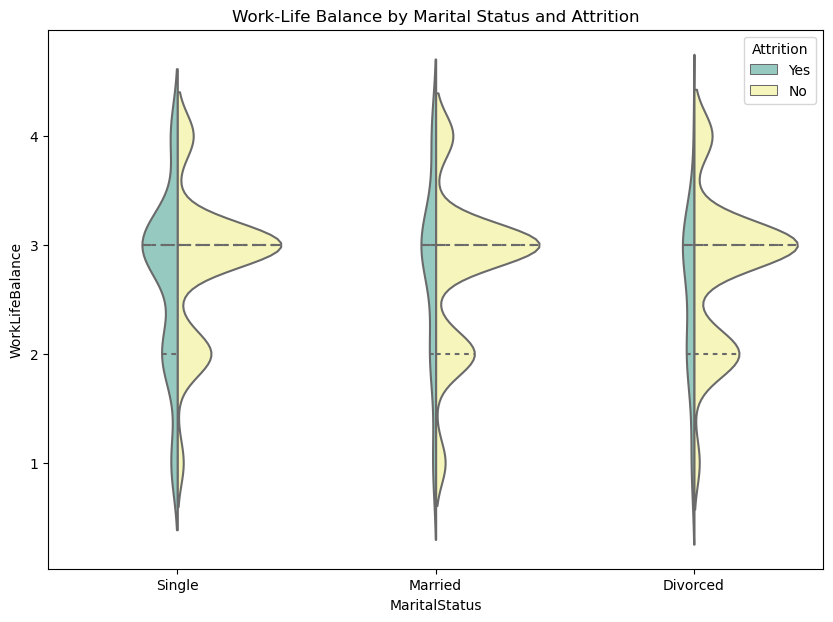

In [28]:
plt.figure(figsize=(10, 7))
sns.violinplot(x="MaritalStatus", y="WorkLifeBalance", hue="Attrition", data=df, split=True, scale="count", inner="quartile", palette="Set3")
plt.title("Work-Life Balance by Marital Status and Attrition")
plt.show()

In the above plot we can see that Work Life balance maintained by singles are quite less therefore there are attritions observed as they have to achieved lots of skills to get better in their career.

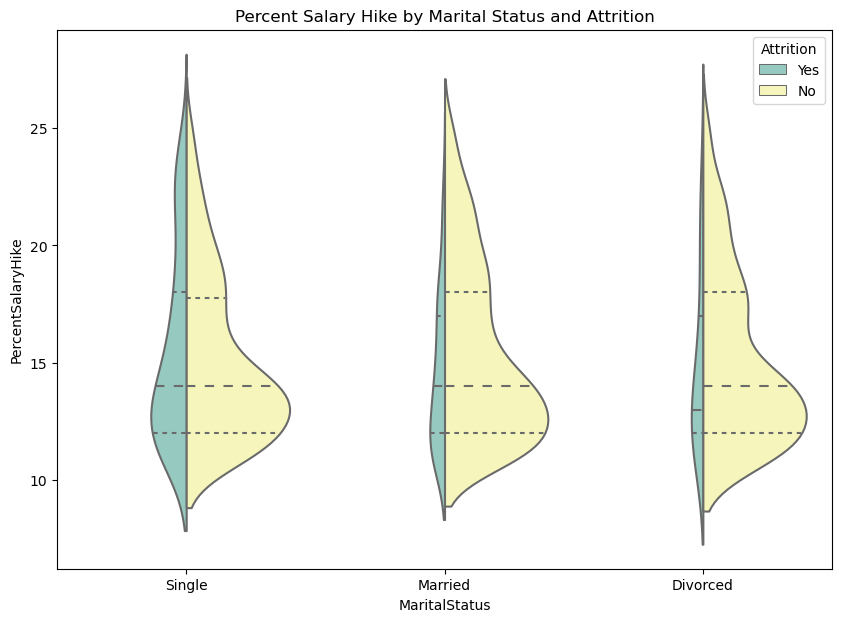

In [29]:
plt.figure(figsize=(10, 7))
sns.violinplot(x="MaritalStatus", y="PercentSalaryHike", hue="Attrition", data=df, split=True, scale="count", inner="quartile", palette="Set3")
plt.title("Percent Salary Hike by Marital Status and Attrition")
plt.show()

In the above violin plot we can see that the Percent Salary Hike plays a major role when it come to Attrition amongst the Singles as comapred to their married or divorced counterparts.

## Encoding

In [30]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

le = LabelEncoder()
le.fit(df["Attrition"])
le.classes_
pd.Series(le.transform(df["Attrition"])).head()

0    1
1    0
2    1
3    0
4    0
dtype: int32

In [31]:
df["Attrition"] = le.fit_transform(df["Attrition"])

In [32]:
df.sample()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
804,48,0,Non-Travel,1262,Research & Development,1,4,Medical,1,Male,...,4,3,0,27,3,2,5,4,2,1


In [33]:
# Ordinal Encoder

oe = OrdinalEncoder()
df['BusinessTravel'] = oe.fit_transform(df['BusinessTravel'].values.reshape(-1,1))
df['Department'] = oe.fit_transform(df['Department'].values.reshape(-1,1))
df['EducationField'] = oe.fit_transform(df['EducationField'].values.reshape(-1,1))
df['Gender'] = oe.fit_transform(df['Gender'].values.reshape(-1,1))
df['JobRole'] = oe.fit_transform(df['JobRole'].values.reshape(-1,1))
df['MaritalStatus'] = oe.fit_transform(df['MaritalStatus'].values.reshape(-1,1))
df['OverTime'] = oe.fit_transform(df['OverTime'].values.reshape(-1,1))

In [34]:
df.sample(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
724,24,0,2.0,1206,1.0,17,1,3.0,4,0.0,...,3,2,2,5,6,3,4,2,3,2
310,31,0,2.0,106,0.0,2,3,0.0,1,1.0,...,3,4,0,9,1,3,2,2,1,0
261,38,0,0.0,1327,2.0,2,2,1.0,4,1.0,...,3,4,1,13,0,3,8,7,7,5


## Correlation

In [35]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


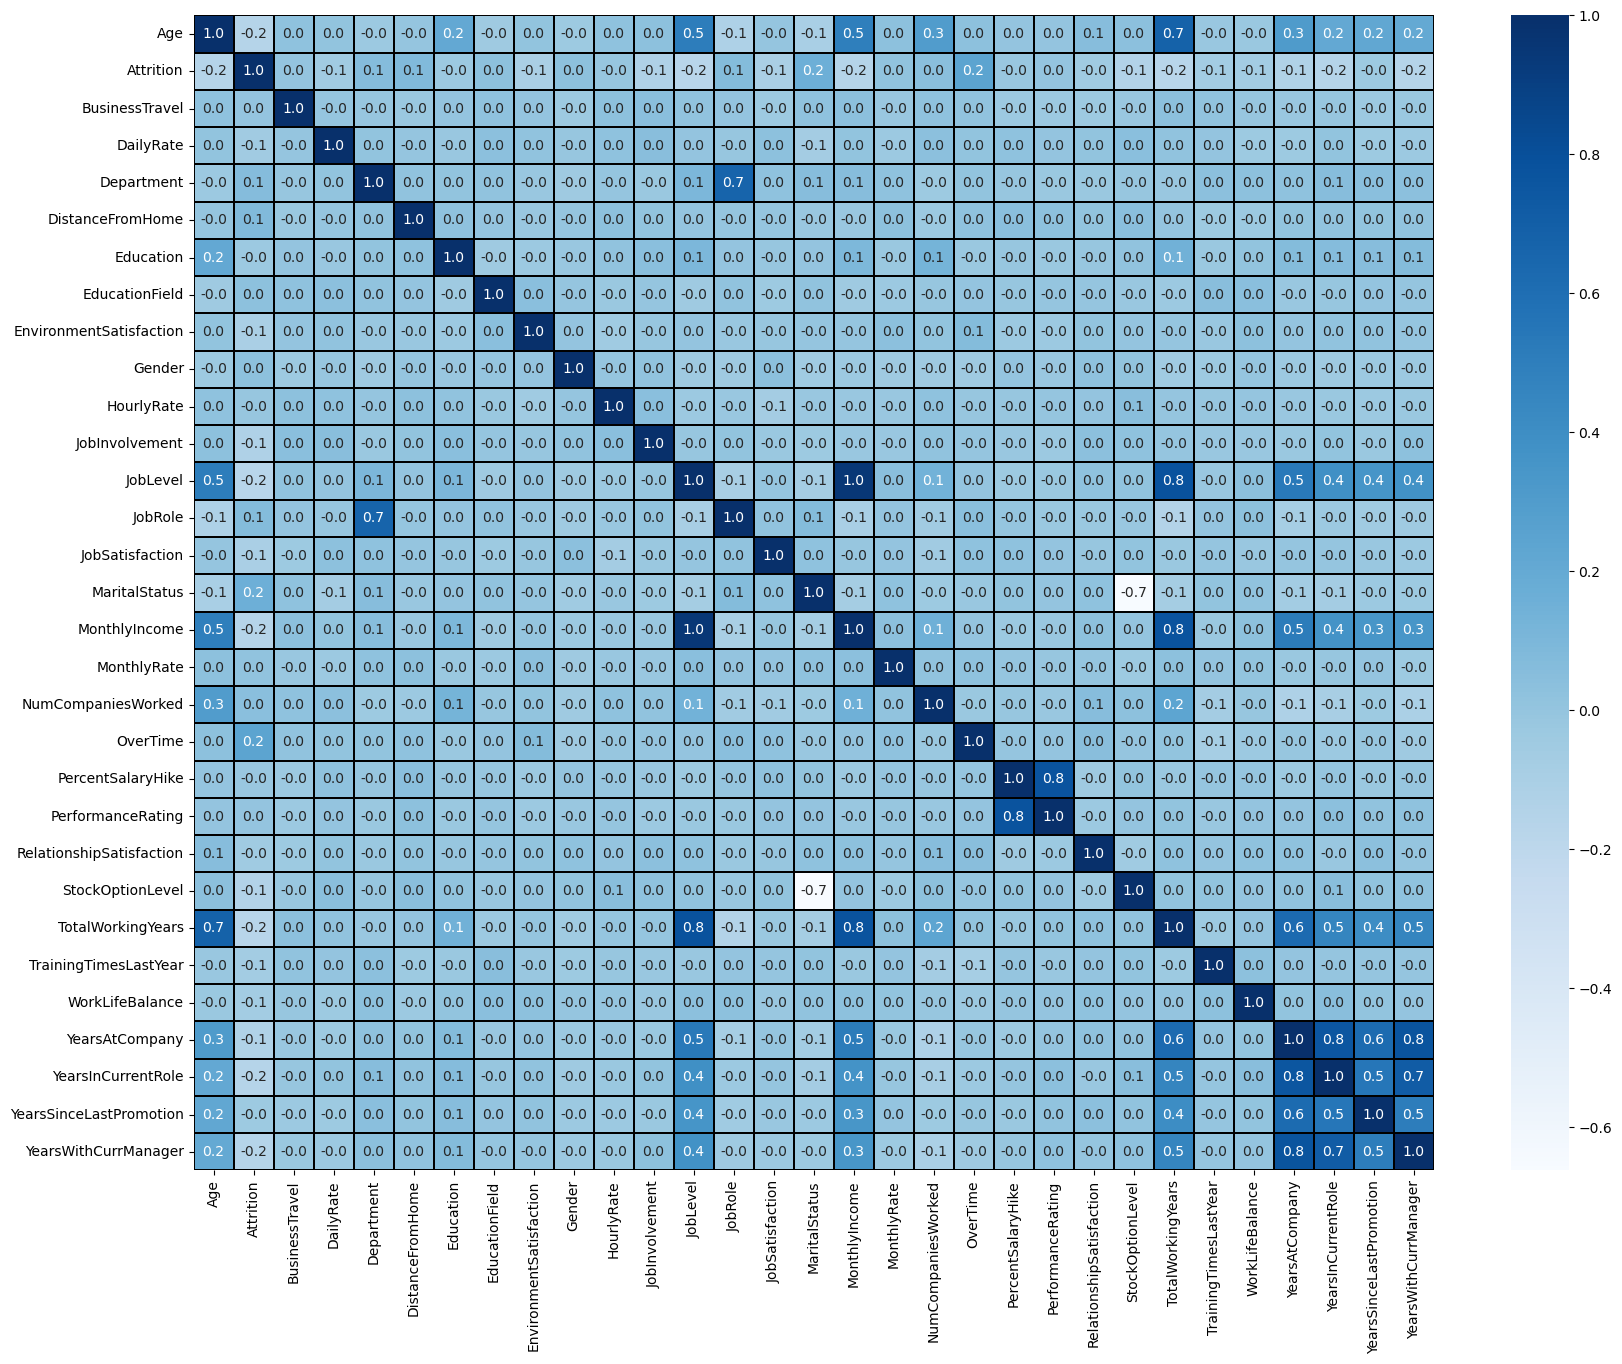

In [36]:
# Visualizing the correlation matrix by plotting a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), linewidths=0.1, fmt=".1f", linecolor="black", annot=True, cmap="Blues")
plt.yticks(rotation=0)
plt.show()


Monthly income and job level are highly +vely corelated 

## Outlier removal using Z-score


In [37]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss after outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100, "%")

df=df1.copy()

Shape of the dataframe before removing outliers:  (1470, 31)
Shape of the dataframe after removing outliers:  (1387, 31)
Percentage of data loss after outlier removal:  5.646258503401361 %


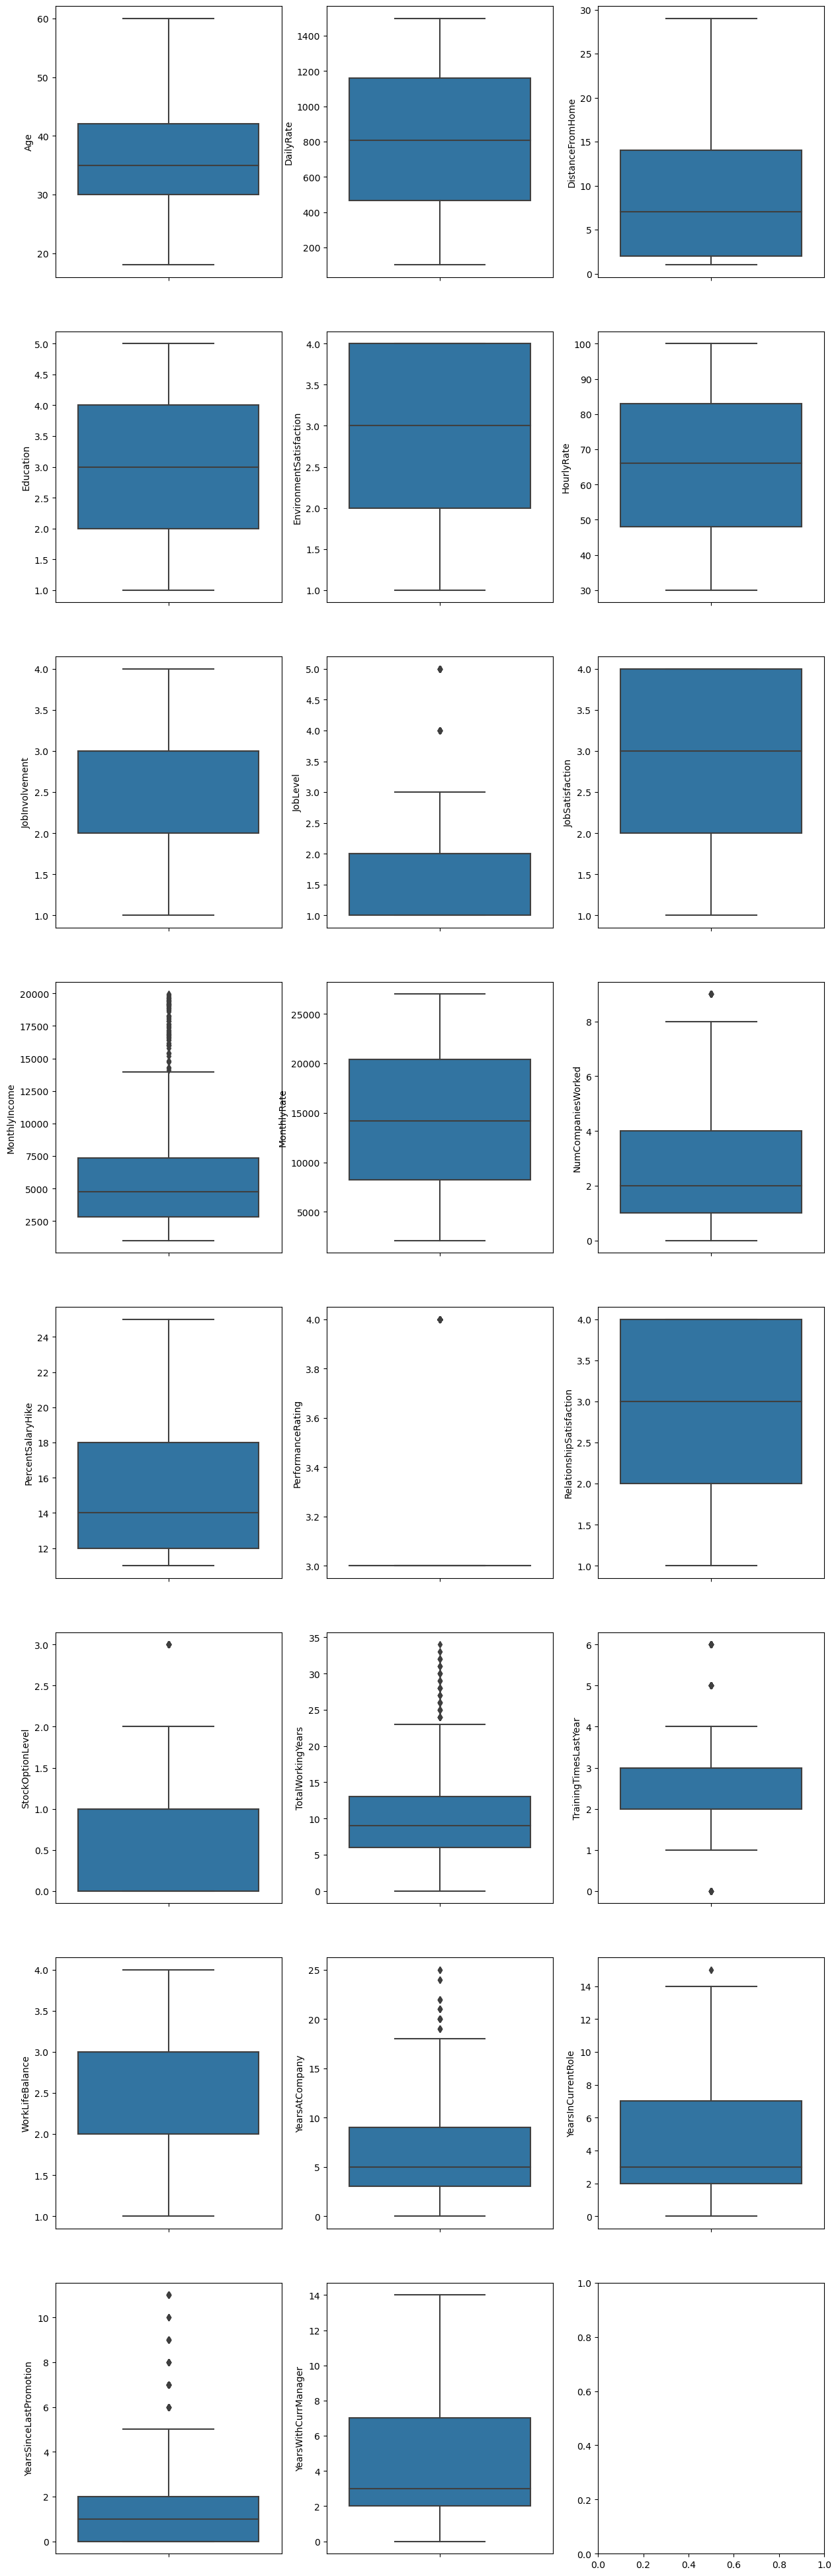

In [38]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatype].items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.show()

## Seprating features and label

In [39]:
x = df.drop('Attrition', axis=1)
y = df['Attrition']

In [40]:
y.value_counts()

Attrition
0    1158
1     229
Name: count, dtype: int64

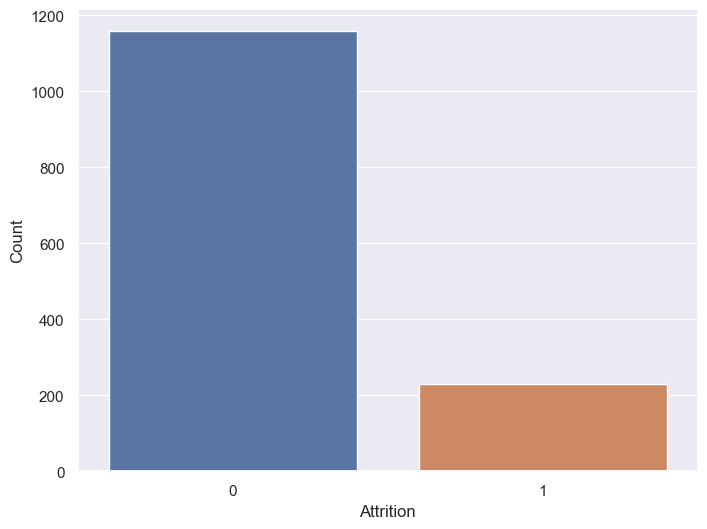

In [41]:
sns.set(style="darkgrid")  
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.ylabel("Count")
plt.show()


## Resolving the class imbalance issue in label column

In [42]:
# adding samples to make all the categorical quality values same
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
x, y= oversample.fit_resample(x, y)

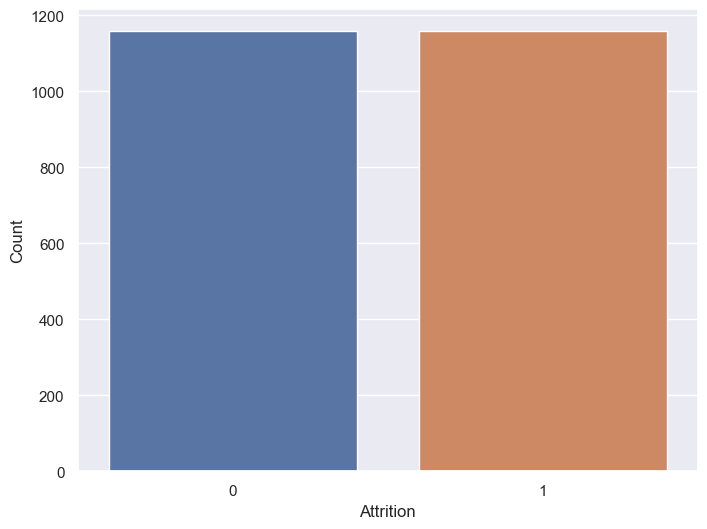

In [43]:
sns.set(style="darkgrid")  
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.ylabel("Count")
plt.show()


## Feature Scaling

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.706622,0.653867,0.858054,1.419033,-1.135448,-0.770862,-1.025539,-0.447721,-1.367010,1.527690,...,-0.337635,-1.431225,-0.726502,-0.157485,-2.146327,-2.124500,0.186118,0.272815,-0.688424,0.610434
1,1.622102,-1.020725,-1.314880,-0.561429,-0.208799,-1.808232,-1.025539,0.475629,0.841319,-0.229580,...,2.961782,1.441977,0.524486,0.156806,0.334159,0.562009,1.101294,1.265755,-0.258785,1.267236
2,0.248881,0.653867,1.573564,-0.561429,-1.003070,-0.770862,1.330347,1.398980,0.841319,1.421189,...,-0.337635,-0.473491,-0.726502,-0.314631,0.334159,0.562009,-1.186647,-1.051104,-0.688424,-1.031570
3,-0.208859,-1.020725,1.623729,-0.561429,-0.870691,1.303880,-1.025539,1.398980,-1.367010,-0.495833,...,-0.337635,0.484243,-0.726502,-0.157485,0.334159,0.562009,0.643706,1.265755,0.600493,-1.031570
4,-0.895469,0.653867,-0.491119,-0.561429,-1.003070,-1.808232,0.545052,-1.371072,0.841319,-1.347843,...,-0.337635,1.441977,0.524486,-0.471776,0.334159,0.562009,-0.729059,-0.389144,0.170854,-0.374768


## Finding best random state for building Regression Models

In [45]:
maxAccu = 0
maxRS = 0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    
    # Apply feature scaling
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    # Initialize and train the logistic regression model
    lr = LogisticRegression(C=1.0, penalty='l2', solver='liblinear')
    lr.fit(x_train, y_train)
    
    # Make predictions and calculate accuracy
    pred = lr.predict(x_test)
    acc_score = (accuracy_score(y_test, pred)) * 100
    
    if acc_score > maxAccu:
        maxAccu = acc_score
        maxRS = i

print("Best accuracy score is", maxAccu, "on Random State", maxRS)


Best accuracy score is 89.63730569948186 on Random State 918


In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=649)

In [47]:
print("x_train shape:",x_train.shape,)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test.shape:",y_test.shape)

x_train shape: (1737, 30)
y_train shape: (1737,)
x_test shape: (579, 30)
y_test.shape: (579,)


## LogisticRegression

In [48]:
LR = LogisticRegression()
LR.fit(x_train, y_train)

predLR = LR.predict(x_test)

accuracy = accuracy_score(y_test, predLR)
conf_matrix = confusion_matrix(y_test, predLR)
class_report = classification_report(y_test, predLR)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Accuracy: 0.8894645941278065

Confusion Matrix:
 [[247  26]
 [ 38 268]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89       273
           1       0.91      0.88      0.89       306

    accuracy                           0.89       579
   macro avg       0.89      0.89      0.89       579
weighted avg       0.89      0.89      0.89       579



## Checking accuracy for RandomForestClassifier


In [49]:
param_combinations = [
    {'n_estimators': 100, 'max_depth': 10, 'criterion': 'gini'},
    {'n_estimators': 150, 'max_depth': 15, 'criterion': 'gini'},
    {'n_estimators': 200, 'max_depth': 20, 'criterion': 'gini'},
    {'n_estimators': 100, 'max_depth': 10, 'criterion': 'entropy'},
    {'n_estimators': 150, 'max_depth': 15, 'criterion': 'entropy'},
    {'n_estimators': 200, 'max_depth': 20, 'criterion': 'entropy'},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    rf_classifier = RandomForestClassifier(**params, random_state=42)
    rf_classifier.fit(x_train, y_train)
    y_pred = rf_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)


Best Parameters: {'n_estimators': 100, 'max_depth': 10, 'criterion': 'gini'}
Test Accuracy: 0.9378238341968912


In [50]:
RFC = RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=15)
RFC.fit(x_train, y_train)

predRFC = RFC.predict(x_test)

accuracy = accuracy_score(y_test, predRFC)
conf_matrix = confusion_matrix(y_test, predRFC)
class_report = classification_report(y_test, predRFC)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9326424870466321
Confusion Matrix:
 [[264   9]
 [ 30 276]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       273
           1       0.97      0.90      0.93       306

    accuracy                           0.93       579
   macro avg       0.93      0.93      0.93       579
weighted avg       0.94      0.93      0.93       579



## Support vector classifier

In [51]:
param_dist = {
    'C': randint(1, 100),
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto', 0.1, 1],
}

svm_classifier = SVC()
random_search = RandomizedSearchCV(estimator=svm_classifier, param_distributions=param_dist, 
                                   n_iter=10, scoring='accuracy', cv=5, random_state=42)

random_search.fit(x_train, y_train)

best_params, best_estimator = random_search.best_params_, random_search.best_estimator_
y_pred = best_estimator.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Test Accuracy:", accuracy)

Best Parameters: {'C': 22, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Test Accuracy: 0.9464594127806563


In [52]:
svc_rbf = SVC(kernel='rbf', gamma='auto', C=22)
svc_rbf.fit(x_train, y_train)

predsvc_rbf = svc_rbf.predict(x_test)

accuracy = accuracy_score(y_test, predsvc_rbf)
conf_matrix = confusion_matrix(y_test, predsvc_rbf)
class_report = classification_report(y_test, predsvc_rbf)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9464594127806563
Confusion Matrix:
 [[255  18]
 [ 13 293]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       273
           1       0.94      0.96      0.95       306

    accuracy                           0.95       579
   macro avg       0.95      0.95      0.95       579
weighted avg       0.95      0.95      0.95       579



## DecisionTreeClassifier

In [53]:
param_combinations = [
    {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    dt_classifier = DecisionTreeClassifier(**params, random_state=42)
    dt_classifier.fit(x_train, y_train)
    y_pred = dt_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)


Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}
Test Accuracy: 0.8756476683937824


In [54]:
dtc = DecisionTreeClassifier(criterion='gini', min_samples_split=2, min_samples_leaf=1)
dtc.fit(x_train, y_train)

pred_dtc = dtc.predict(x_test)

accuracy = accuracy_score(y_test, pred_dtc)
conf_matrix = confusion_matrix(y_test, pred_dtc)
class_report = classification_report(y_test, pred_dtc)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8549222797927462
Confusion Matrix:
 [[232  41]
 [ 43 263]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85       273
           1       0.87      0.86      0.86       306

    accuracy                           0.85       579
   macro avg       0.85      0.85      0.85       579
weighted avg       0.85      0.85      0.85       579



## ExtraTreesClassifier


In [55]:
param_combinations = [
    {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 150, 'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 150, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    et_classifier = ExtraTreesClassifier(**params, random_state=42)
    et_classifier.fit(x_train, y_train)
    y_pred = et_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)


Best Parameters: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}
Test Accuracy: 0.9481865284974094


In [56]:
EXC = ExtraTreesClassifier(n_estimators=100, criterion='entropy')
EXC.fit(x_train, y_train)

pred_EXC = EXC.predict(x_test)

accuracy = accuracy_score(y_test, pred_EXC)
conf_matrix = confusion_matrix(y_test, pred_EXC)
class_report = classification_report(y_test, pred_EXC)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9464594127806563
Confusion Matrix:
 [[261  12]
 [ 19 287]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       273
           1       0.96      0.94      0.95       306

    accuracy                           0.95       579
   macro avg       0.95      0.95      0.95       579
weighted avg       0.95      0.95      0.95       579



 ## GradientBoostingClassifier

In [57]:
param_combinations = [
    {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 150, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 4},
    {'n_estimators': 150, 'learning_rate': 0.05, 'max_depth': 4},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    gb_classifier = GradientBoostingClassifier(**params, random_state=42)
    gb_classifier.fit(x_train, y_train)
    y_pred = gb_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)


Best Parameters: {'n_estimators': 150, 'learning_rate': 0.1, 'max_depth': 3}
Test Accuracy: 0.9412780656303973


In [58]:
GBC = GradientBoostingClassifier(n_estimators=150, learning_rate=0.05, max_depth=4)
GBC.fit(x_train, y_train)

pred_GBC = GBC.predict(x_test)

accuracy = accuracy_score(y_test, pred_GBC)
conf_matrix = confusion_matrix(y_test, pred_GBC)
class_report = classification_report(y_test, pred_GBC)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9309153713298791
Confusion Matrix:
 [[262  11]
 [ 29 277]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.96      0.91      0.93       306

    accuracy                           0.93       579
   macro avg       0.93      0.93      0.93       579
weighted avg       0.93      0.93      0.93       579



## AdaBoostClassifier

In [59]:
param_combinations = [
    {'n_estimators': 50, 'learning_rate': 1.0},
    {'n_estimators': 100, 'learning_rate': 0.5},
    {'n_estimators': 150, 'learning_rate': 0.1},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    ada_classifier = AdaBoostClassifier(**params, random_state=42)
    ada_classifier.fit(x_train, y_train)
    y_pred = ada_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)


Best Parameters: {'n_estimators': 100, 'learning_rate': 0.5}
Test Accuracy: 0.9360967184801382


In [60]:
ABC = AdaBoostClassifier(n_estimators=100, learning_rate=0.5)
ABC.fit(x_train, y_train)

pred_ABC = ABC.predict(x_test)

accuracy = accuracy_score(y_test, pred_ABC)
conf_matrix = confusion_matrix(y_test, pred_ABC)
class_report = classification_report(y_test, pred_ABC)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.9360967184801382
Confusion Matrix:
 [[260  13]
 [ 24 282]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       273
           1       0.96      0.92      0.94       306

    accuracy                           0.94       579
   macro avg       0.94      0.94      0.94       579
weighted avg       0.94      0.94      0.94       579



## Support vector classifier Gives better Result

## Cross Validation Score

In [61]:
# Checking cv score for Support vector classifier
score = cross_val_score(svc_rbf, x, y, cv=5)
print(score)
print(score.mean())
print( accuracy_score(y_test, predRFC) - score.mean())

[0.77586207 0.96976242 0.96544276 0.95896328 0.95032397]
0.9240709019140538
0.008571585132578274


## Saving the model

In [62]:
import joblib
# Save the model as a objectfile

joblib.dump(svc_rbf,'HR_Analytics_Project')

['HR_Analytics_Project']

In [63]:
model=joblib.load(open("HR_Analytics_Project","rb"))


In [64]:
model

SVC(C=22, gamma='auto')